Evolución de los Precios de la Electricidad
===

# Instrucciones

En el archivo `precios.zip`  se encuentran los archivos `Precio_Bolsa_Nacional_($kwh)_ano.xls` en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada realice las siguientes actividades. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Debe transformar la tabla de tal forma que quede con las columnas `Fecha`, `Hora` y `Precio` (únicamente tres columnas).

## Preparacion de datos

In [2]:
# Cargar datos
year_range = range(1995, 2019)

list_df = []
for year in year_range:
    if year > 2015:
        # El valor que esta dentro de format reemplaza {} en el string
        # Equivale a escribir :
        #"./precios/Precio_Bolsa_Nacional_($kwh)_" + str(year) +".xls"
        
        path = "./input_files/Precio_Bolsa_Nacional_($kwh)_{}.xls".format(str(year))

    else:
        path = "./input_files/Precio_Bolsa_Nacional_($kwh)_{}.xlsx".format(str(year))
    
    if year >1999:
        df_aux = pd.read_excel(path, skiprows=2)
    else:
        df_aux = pd.read_excel(path, skiprows=3)
    list_df.append(df_aux.iloc[:, 0:25])

In [3]:
df = pd.concat(list_df, sort=False)
df.head(3)

,Fecha,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,1995-07-20,NaN,1.073,1.073,1.073,1.073,1.073,1.073,1.073,1.074,...,1.073,1.073,1.073,1.073,1.074,1.897,1.897,1.897,1.073,1.073
1,1995-07-21,1.073,1.000,1.000,1.000,1.000,1.000,5.000,6.000,6.000,...,5.000,1.000,1.000,5.000,12.000,16.670,11.929,5.000,1.000,1.000
2,1995-07-22,1.073,1.073,1.000,1.000,1.000,1.073,1.303,1.303,1.303,...,1.073,1.000,1.000,1.000,1.303,2.500,2.500,1.303,1.073,1.073


In [4]:
columns = range(0,24)
columns = [str(x) for x in columns]
data = list()

for index, row in df.iterrows():
    for col in columns:
        # se limpia el campo de la fecha
        data.append([str(row['Fecha']).split(" ")[0], col, row[col]])
df = pd.DataFrame(data, columns=["Fecha", "Hora", "Precio"])

In [5]:
# Validamos los datos faltantes
df.isna().sum()

Fecha       0
Hora        0
Precio    238
dtype: int64

**3.--** Compute e imprima el número de registros duplicados.

In [6]:
duplicados_string = df["Fecha"] + df["Hora"]

In [7]:
duplicados_string.count()

201816

In [8]:
df[df.duplicated()].count()

Fecha     1951
Hora      1951
Precio    1759
dtype: int64

In [9]:
# Si bien hay datos duplicados en la columna de Precio, se decide no eliminar dichos datos dado que pertenecen a diferentes dias.
# Es decir, no hay registros que exactamente sean lo mismo en las 3 columnas.

Dado que la fecha y la hora son datos unicos no se encontraron duplicados

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [10]:
len(df)

201816

In [11]:
df.dropna(inplace=True)

In [12]:
len(df)
print("Verificar")
df.isna().sum()

Verificar


Fecha     0
Hora      0
Precio    0
dtype: int64

In [13]:
# Borro elementos con precio = 0
df = df[df["Precio"] != 0.0]
df = df[df["Precio"] != 0]
len(df)

201482

In [14]:
#Filtros para responder las siguientes preguntas 
df_aux = df.copy()
df_aux['Fecha'] = pd.to_datetime(df['Fecha'])

df_aux['Mes']  = df_aux.Fecha.dt.month
df_aux['Mes_Nombre'] = df_aux.Fecha.dt.month_name()
df_aux['Anno'] = df_aux.Fecha.dt.year
df_aux['Dia'] = df_aux.Fecha.dt.day
df_aux['Dia_semana'] = df_aux.Fecha.dt.dayofweek
df_aux['Dia_nombre'] = df_aux.Fecha.dt.day_name()
df_aux.head(3)

,Fecha,Hora,Precio,Mes,Mes_Nombre,Anno,Dia,Dia_semana,Dia_nombre
1,1995-07-20,1,1.073,7,July,1995,20,3,Thursday
2,1995-07-20,2,1.073,7,July,1995,20,3,Thursday
3,1995-07-20,3,1.073,7,July,1995,20,3,Thursday


**5.--** Compute y grafique el precio promedio diario.

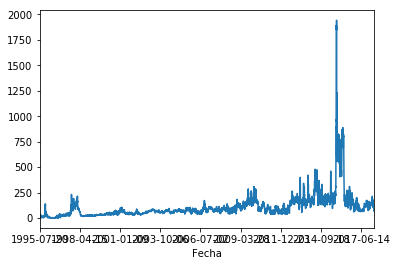

In [15]:
precio_promedio_diario = df.groupby("Fecha")["Precio"].mean()
dias = precio_promedio_diario.keys()
precio_promedio_diario.plot(kind="line")

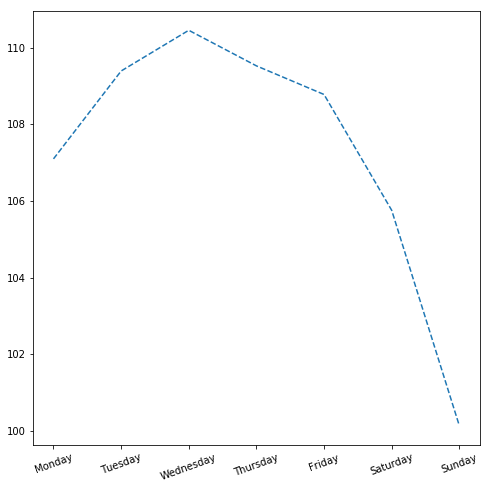

In [16]:
Dias_media = df_aux.groupby(['Dia_semana'])["Precio"].mean()
Dias_Nombre = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(Dias_Nombre,Dias_media.values, scaley=True, linestyle="--")
plt.xticks(Dias_Nombre, Dias_Nombre, rotation=20)
plt.show()

**6.--** Compute y grafique el precio máximo por mes.

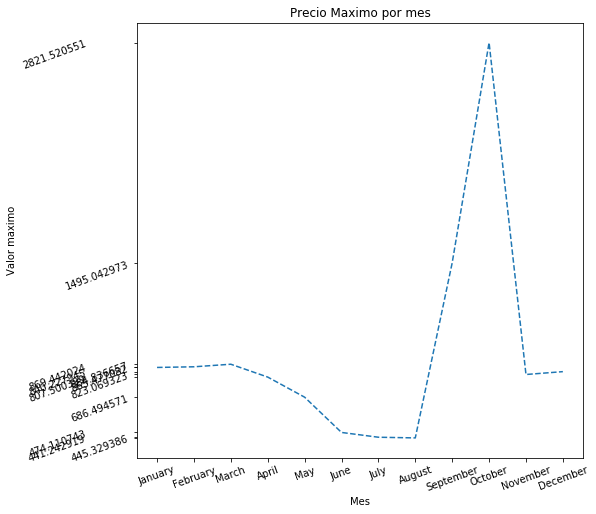

In [17]:
Max_meses = df_aux.groupby(['Mes'])["Precio"].max()
Meses_Nombre = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December' ]

fig, ax = plt.subplots(figsize=(8,8))
ax.plot(Meses_Nombre,Max_meses.values, scaley=True, linestyle="--")
ax.set_xlabel("Mes")
ax.set_ylabel("Valor maximo")
ax.set_title("Precio Maximo por mes")
plt.xticks(Meses_Nombre, Meses_Nombre, rotation=20)
plt.yticks(Max_meses.values, Max_meses.values ,rotation=20)
labels = ax.set_yticklabels(Max_meses.values)
for i, label in enumerate(labels):
    label.set_x(label.get_position()[1] - (i % 2) * 0.095)
    label.set_y(label.get_position()[1] - (i % 2) * 0.095)
plt.show()

**7.--** Compute y grafique el precio mínimo mensual.

In [18]:
Min_meses = df_aux.groupby(['Mes'])["Precio"].min()

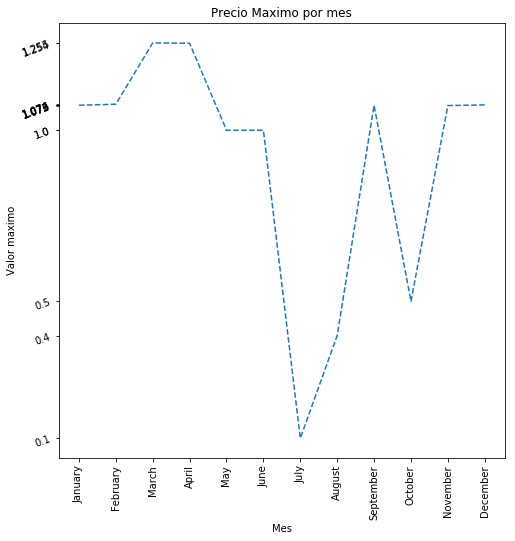

In [19]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(Meses_Nombre,Min_meses.values, linestyle="--")
ax.set_xlabel("Mes")
ax.set_ylabel("Valor maximo")
ax.set_title("Precio Maximo por mes")
plt.xticks(Meses_Nombre, Meses_Nombre, rotation='vertical')
plt.yticks(Min_meses.values, Min_meses.values, rotation= 20)
labels = ax.set_yticklabels(Min_meses.values)
for i, label in enumerate(labels):
    label.set_y(label.get_position()[1] - (i % 2) * 0.15)
plt.show()

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

In [20]:
Mean_meses = df_aux.groupby(['Mes'])["Precio"].mean().sort_index()

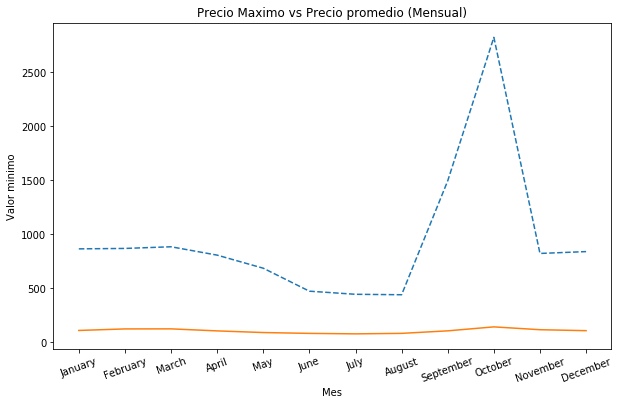

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(Meses_Nombre,Max_meses.values, linestyle="--")
ax.plot(Meses_Nombre,Mean_meses.values, linestyle="-")
ax.set_xlabel("Mes")
ax.set_ylabel("Valor minimo")
ax.set_title("Precio Maximo vs Precio promedio (Mensual)")
plt.xticks(Meses_Nombre, Meses_Nombre, rotation=20)
plt.show()

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

**********
Thursday     28865
Wednesday    28815
Saturday     28794
Tuesday      28772
Friday       28770
Sunday       28738
Monday       28728
Name: Dia_nombre, dtype: int64
**********
Thursday     28865
Wednesday    28815
Tuesday      28772
Friday       28770
Monday       28728
Name: Dia_nombre, dtype: int64


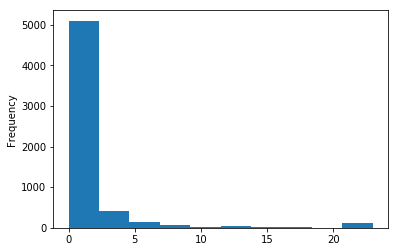

In [22]:
df_dias_laborales = df_aux.copy()
print("*"*10)
print(df_dias_laborales.Dia_nombre.value_counts())
# Eliminando el dia sabado y domingo
print("*"*10)
df_dias_laborales = df_dias_laborales[df_dias_laborales["Dia_nombre"] != "Saturday"]
df_dias_laborales = df_dias_laborales[df_dias_laborales["Dia_nombre"] != "Sunday"]
print(df_dias_laborales.Dia_nombre.value_counts())

Max_dia = df_dias_laborales.loc[df_dias_laborales.groupby(['Fecha'])["Precio"].idxmin()][["Fecha", "Precio", "Hora"]]
Max_dia["Hora"] = pd.to_numeric(Max_dia['Hora'])
Max_dia["Hora"].plot(kind="hist")

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

**********
Thursday     28865
Wednesday    28815
Saturday     28794
Tuesday      28772
Friday       28770
Sunday       28738
Monday       28728
Name: Dia_nombre, dtype: int64
**********
Saturday    28794
Name: Dia_nombre, dtype: int64


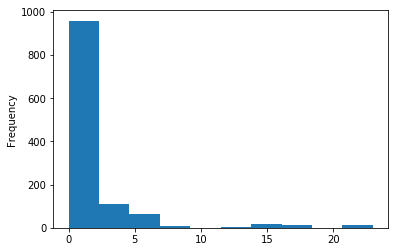

In [23]:
df_sabado = df_aux.copy()
print("*"*10)
print(df_sabado.Dia_nombre.value_counts())
# Eliminando el dia sabado y domingo
print("*"*10)
df_sabado = df_sabado[df_sabado["Dia_nombre"] == "Saturday"]
print(df_sabado.Dia_nombre.value_counts())

#Max_sabado = df_sabado.groupby(['Hora'])["Precio"].max().sort_index()

Max_sabado = df_sabado.loc[df_sabado.groupby(['Fecha'])["Precio"].idxmin()][["Fecha", "Precio", "Hora"]]
Max_sabado["Hora"] = pd.to_numeric(Max_sabado['Hora'])
Max_sabado["Hora"].plot(kind="hist")


**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

**********
Thursday     28865
Wednesday    28815
Saturday     28794
Tuesday      28772
Friday       28770
Sunday       28738
Monday       28728
Name: Dia_nombre, dtype: int64
**********
Saturday    28794
Name: Dia_nombre, dtype: int64
**********
Thursday     28865
Wednesday    28815
Saturday     28794
Tuesday      28772
Friday       28770
Sunday       28738
Monday       28728
Name: Dia_nombre, dtype: int64
**********
Saturday    28794
Name: Dia_nombre, dtype: int64


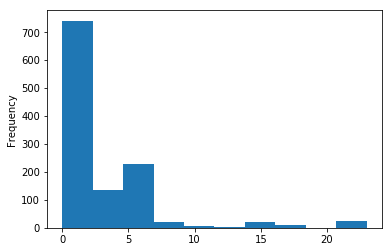

In [24]:
df_domingo = df_aux.copy()
print("*"*10)
print(df_domingo.Dia_nombre.value_counts())
# Eliminando el dia sabado y domingo
print("*"*10)
df_domingo = df_domingo[df_domingo["Dia_nombre"] == "Sunday"]
print(df_sabado.Dia_nombre.value_counts())

Max_domingo = df_domingo.groupby(['Hora'])["Precio"].max().sort_index()

df_domingo = df_aux.copy()
print("*"*10)
print(df_domingo.Dia_nombre.value_counts())
# Eliminando el dia sabado y domingo
print("*"*10)
df_domingo = df_domingo[df_domingo["Dia_nombre"] == "Sunday"]
print(df_sabado.Dia_nombre.value_counts())


Max_domingo = df_domingo.loc[df_domingo.groupby(['Fecha'])["Precio"].idxmin()][["Fecha", "Precio", "Hora"]]
Max_domingo["Hora"] = pd.to_numeric(Max_domingo['Hora'])
Max_domingo["Hora"].plot(kind="hist")
plt.show()

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [25]:
valor_min = df_aux.loc[df_aux.groupby(['Anno'])["Precio"].idxmin()][["Fecha", "Precio"]]
fechas = valor_min.values[:,0]
fechas = [str(fecha) for fecha in fechas]
fechas = [fecha.split(" ")[0] for fecha in fechas]
valores = valor_min.values[:,1]

datos_tabla = [[fechas[i], valores[i]] for i in range(len(fechas))]

[]

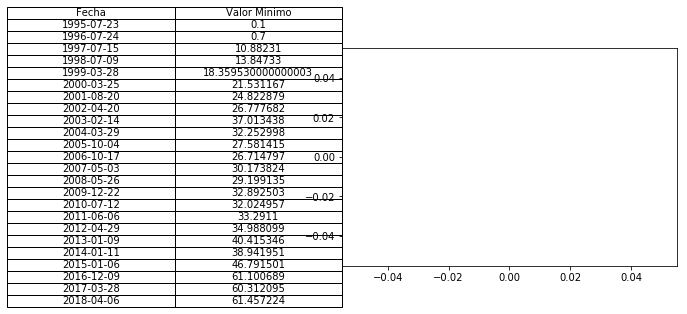

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.table(cellText=datos_tabla, colLabels=['Fecha', 'Valor Minimo'] ,loc='left', cellLoc='center')
plt.plot()

**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

---